## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 74](#Problem-74)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 74 <a name="Problem-74"></a>

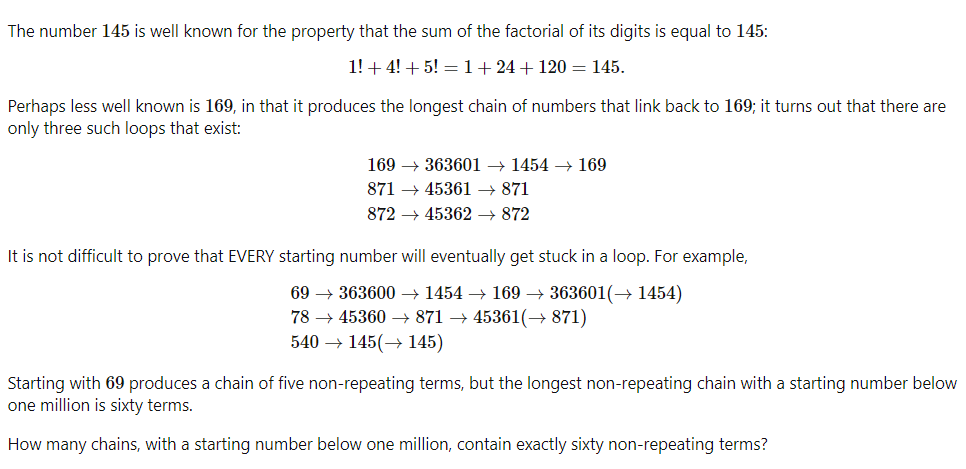

<br>
$**Hint**$

It's interesting to note that all digits permutations of a number, also have the same amount of chains.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
from itertools import permutations

## Main Solution <a name="Main-Solution"></a>

First we build our necessary functions

In [ ]:
def factorial(n):
    result = 1
    for i in range(2, n+1):
        result *= i
    return result

def sum_fact_digits(n):
    sum = 0
    for i in str(n):
        sum += factorial(int(i))

    return sum

Then we try to define a function that efficiently calculates the number of all terms in a digit factorial chain. beside the point ginven in the hint, we also use a memory table to reduce the runnig time.

In [ ]:
memory = {145:1,
          169:3,
          871:2,
          872:2}

def count_term(n):
    if n in memory:
        return memory[n]
    t = n
    s = set()
    while t not in s:
        s.add(t)
        t = sum_fact_digits(t)

    pers = list(permutations(str(n)))
    for p in pers:
        memory[int(''.join(p))] = len(s)

    return memory[n]

Now we tackle the problem

In [ ]:
start_time = time.time()

count = 0
for i in range(1,10**6):
    if count_term(i)==60:
        count += 1

answer = count

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 402 
Execution time: 3.7326 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

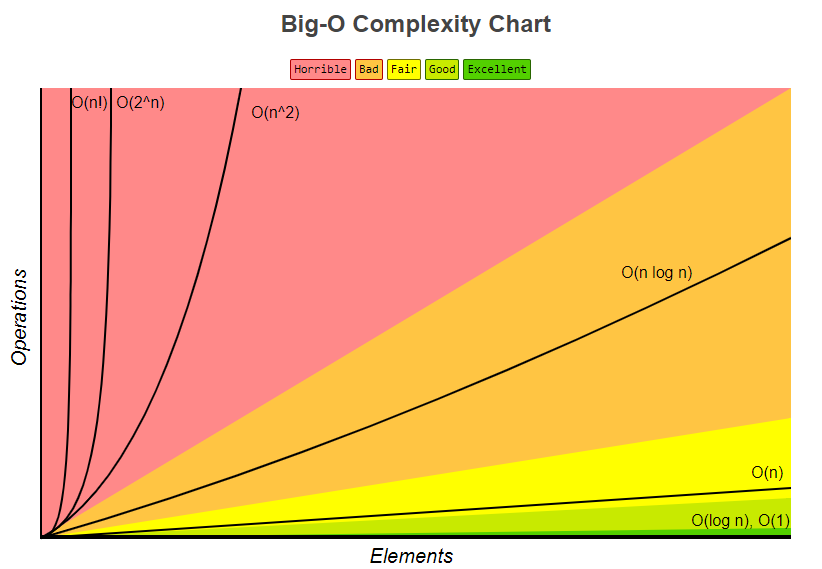

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
1. `factorial()` function: The `factorial()` function calculates the factorial of a number by iterating from 2 to n. This takes $O(n)$ time, where $n$ is the input number.

2. `sum_fact_digits()` function: The `sum_fact_digits()` function calculates the sum of factorials of each digit in the input number. The time complexity of this function depends on the number of digits in the input number, which is $O(log(n))$, where $n$ is the input number.

3. `count_term()` function: The `count_term()` function uses the `sum_fact_digits()` function and iterates until it finds a repeating sequence or reaches a previously calculated number. The time complexity of this function depends on the length of the repeating sequence, which can be at most the number of permutations of the digits in the input number. The maximum number of permutations is `factorial(d)`, where $d$ is the number of digits in the input number. Therefore, the time complexity of `count_term()` is $O(d!)$, where $d$ is the number of digits.

4. Main loop: The main loop iterates from 1 to 1,000,000 and calls the `count_term()` function for each number. The total number of iterations is 1,000,000, so the time complexity of the main loop is $O(1,000,000)$.

Therefore, the overall **time complexity** of the code is dominated by the `count_term()` function, which is $O(d!)$ in the worst case, where $d$ is the number of digits in the input number.

Space Complexity:
1. `factorial()` function: The function uses a constant amount of space, so it has $O(1)$ space complexity.

2. `sum_fact_digits()` function: The function uses a variable to store the sum of factorials of digits, but the space used by this variable is proportional to the number of digits in the input number, which is $O(log(n))$.

3. memory dictionary: The code uses a dictionary called `memory` to store previously calculated results. The size of this dictionary can grow up to the maximum number of permutations of the digits, which is `factorial(d)`, where $d$ is the number of digits in the input number. Therefore, the space complexity of the `memory` dictionary is $O(d!)$.

4. Main loop: The main loop uses a constant amount of space for the variables `count` and `i`, so it has $O(1)$ space complexity.

Therefore, the overall **space complexity** of the code is dominated by the memory dictionary, which is $O(d!)$ in the worst case, where $d$ is the number of digits in the input number.